# **Metropolis Monte Carlo: Esercizio 2 punto 4**

Implement a Metropolis MC loop to find the equilibrium configuration of a Ag cluster of fixed number of atoms 𝑁, randomly deposited on the flat ℎ 𝑥,𝑦 = 0 substrate. The energy of each configuration is evaluated by counting all bonds, (energies 𝐽0 and 𝐽1) formed by the 𝑁 atoms above the substrate. Each MC move consists in relocating one adatom at a randomly chosen site.

## *SVOLGIMENTO PUNTO 4*

Study the equilibrium configuration of the 𝑁 = 25 cluster as a function of temperature, in the range 1 − 2700 𝐾. For each simulation compute the average energy 𝐸 and standard deviation $\Sigma = \sqrt{\langle E^2 \rangle - \langle E \rangle^2}$ at equilibrium (find the appropriate number of MC steps to be excluded as corresponding to thermalization and run the loop long enough to have a sufficient number of configurations to obtain meaningful averages). Check robustness by repeating the calculation for different seeds. Plot 𝐸(𝑇) and 𝛴(𝑇) (select a convenient set of 𝑇 values to trace smooth curves). Repeat the analysis for 𝐿 = 40 and 𝐿 = 20 and compare the 𝐸(𝑇) and 𝛴(𝑇) curves. Interpret the result.

---

### 0) Importazioni e dati

In [1]:
import numpy as np
from CMS.MonteCarlo.MetropolisMonteCarlo import MetropolisMonteCarlo

In [ ]:
temperatures = np.array([0, 1, 400, 700, 850, 950, 1000, 1100, 1200, 1300, 1400, 1500, 1750, 1850, 2000, 2300, 2700])
L = [(60,60), (40,40), (20,20)] # dimensioni della griglia in celle
N_atoms = 25 # numero di atomi da posizionare
seeds = [45253, 4234, 45414, 5678901, 847, 8765432, 4123,
        5323323, 4324876, 7586544, 2345678, 421, 1267, 7654321,
        135715, 8642864, 9753975, 11311, 22122, 333133, 444144]

### 1) Simulazione

In [3]:
from CMS.MonteCarlo.ioMMC import XYZwriter

15 temperature, un seed, 2_000_000 step di cui 200_000 termalizzazione: 16minuti 15secondi.\
3 griglie, 17 temperature, 21 seed, 400_000 step di cui 100_000 termalizzazione (post-ottimizzazione): 51min

In [ ]:
results_dict = {} # per ora non lo uso
mean_energies = {}
std_energies = {}

# tre griglie
for Lx, Ly in L:
    mean_energies[Lx+Ly] = {}
    std_energies[Lx+Ly] = {}
    # temperature da 0 a 2700K
    for T in temperatures:
        print(f"===== Simulazione con T={T} K =====")
        # medio l'energia ottenuta in simulazioni con seed diversi
        for seed in seeds:
            mean = 0
            std = 0
            print(f"----- Simulazione con seed={seed} -----")
            # prima senza output per fare alla svelta
            xyz_writer = None
            # xyz_writer = XYZwriter(output_folder=f"output/Es2_4/seed={seed}/MMC~N={N_atoms}~T={T}/")
            simulazione = MetropolisMonteCarlo(
                L=(Lx,Ly),
                N_atoms=N_atoms,
                T=T,
                xyz_writer=xyz_writer,
                seed=seed,
            )
            result = simulazione.run(N_steps=400_000, thermalization_steps=100_000)
            
            # salvo solo energia media e dev st, a loro volte mediate su più seed
            mean += result.avg_energy
            std += result.std_energy
            
        # il valore medio è la media dei valori medi
        mean_energies[Lx+Ly][T] = mean / len(seeds)
        # la varianza media è la media delle varianze
        std_energies[Lx+Ly][T] = std / np.sqrt(len(seeds))

===== Simulazione con T=0 K =====
----- Simulazione con seed=45253 -----
----- Simulazione con seed=4324234 -----
----- Simulazione con seed=45414 -----
----- Simulazione con seed=5678901 -----
----- Simulazione con seed=847 -----
----- Simulazione con seed=8765432 -----
----- Simulazione con seed=4123 -----
----- Simulazione con seed=53243323 -----
----- Simulazione con seed=43242876 -----
----- Simulazione con seed=7586544 -----
----- Simulazione con seed=2345678 -----
----- Simulazione con seed=42 -----
----- Simulazione con seed=1234567 -----
----- Simulazione con seed=7654321 -----
----- Simulazione con seed=1357135 -----
----- Simulazione con seed=8642864 -----
----- Simulazione con seed=9753975 -----
----- Simulazione con seed=1111111 -----
----- Simulazione con seed=2222222 -----
----- Simulazione con seed=3333333 -----
----- Simulazione con seed=4444444 -----
===== Simulazione con T=1 K =====
----- Simulazione con seed=45253 -----
----- Simulazione con seed=4324234 -----
-----

### 2) Analisi e plot

In [5]:
import matplotlib.pyplot as plt

#### Energia media vs T

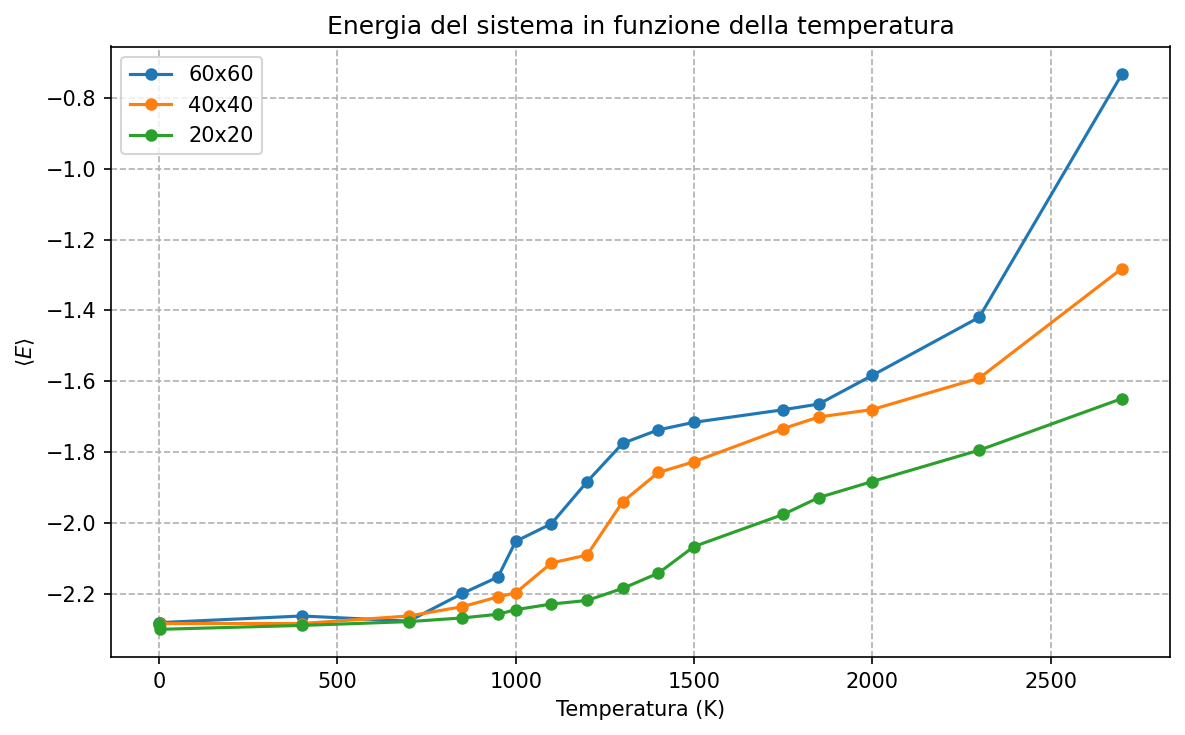

In [11]:
# plot energia minima v N
plt.figure(figsize=(8, 5), dpi=150)

for Lx,Ly in L:
    x = temperatures
    # y = [results_dict[T].avg_energy for T in temperatures]
    y = [mean_energies[Lx+Ly][T] for T in temperatures]
    plt.plot(x, y, marker='o', markersize=5, label=f"{Lx}x{Ly}")
    
plt.xlabel('Temperatura (K)')
plt.ylabel(r'$\langle E \rangle$')
plt.title('Energia del sistema in funzione della temperatura')
plt.grid(linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

#### Potenziale chimico vs N

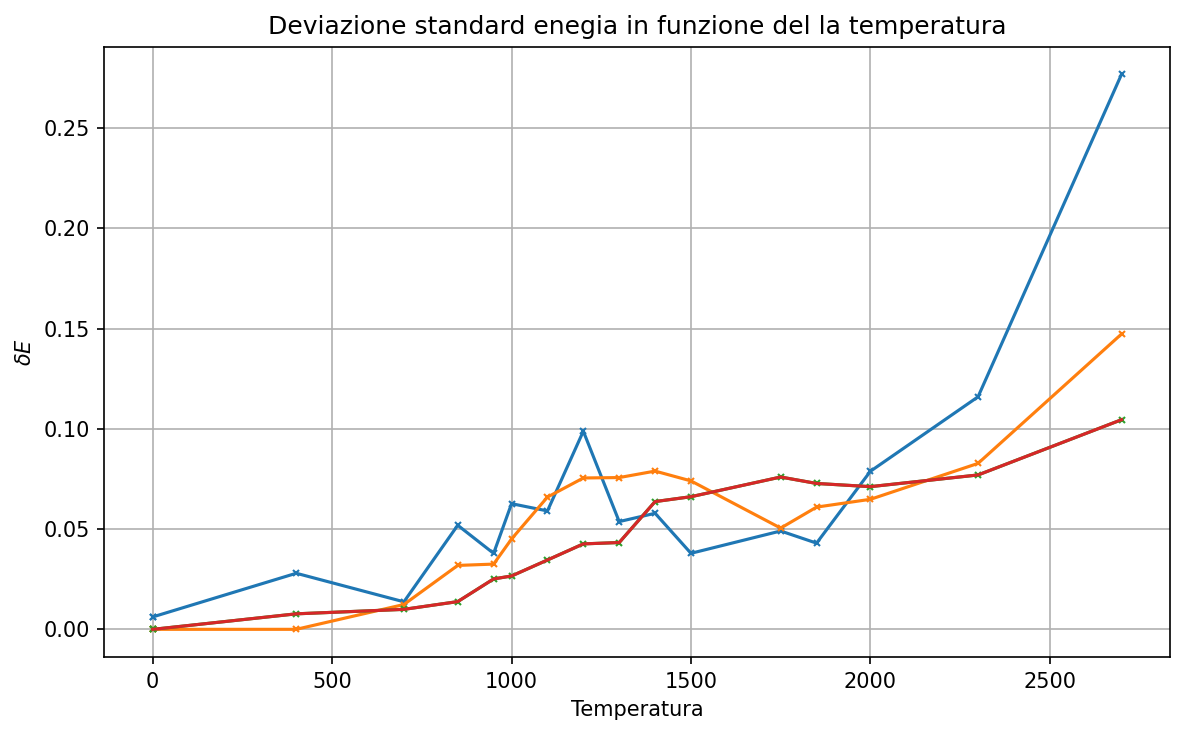

In [10]:
# plot energia/N v N
plt.figure(figsize=(8, 5), dpi=150)

for Lx,Ly in L:
    x = temperatures
    # y = [results_dict[T].avg_energy for T in temperatures]
    y = [std_energies[Lx+Ly][T] for T in temperatures]
    plt.plot(x, y, marker='x', markersize=3, label=f"{Lx}x{Ly}")

plt.plot(x, y)
plt.xlabel('Temperatura')
plt.ylabel(r'$\delta E$')
plt.title('Deviazione standard enegia in funzione del la temperatura')
plt.grid()
plt.tight_layout()
plt.show()

In [8]:
# Energia su step

plt.figure(figsize=(8, 5), dpi=150)

x1 = range(len(results_dict[100].energies))
y1 = results_dict[100].energies

x2 = range(len(results_dict[500].energies))
y2 = results_dict[500].energies


x4 = range(len(results_dict[2250].energies))
y4 = results_dict[2250].energies

plt.plot(x1, y1, label='T=100K')
plt.plot(x2, y2, label='T=500K')

plt.plot(x4, y4, label='T=2250K')
plt.legend()
plt.xlabel('Step')
plt.ylabel(r'$E$')
plt.title('Energia in funzione dello step')
plt.grid()
plt.tight_layout()
plt.show()

KeyError: 100

<Figure size 1200x750 with 0 Axes>

: 